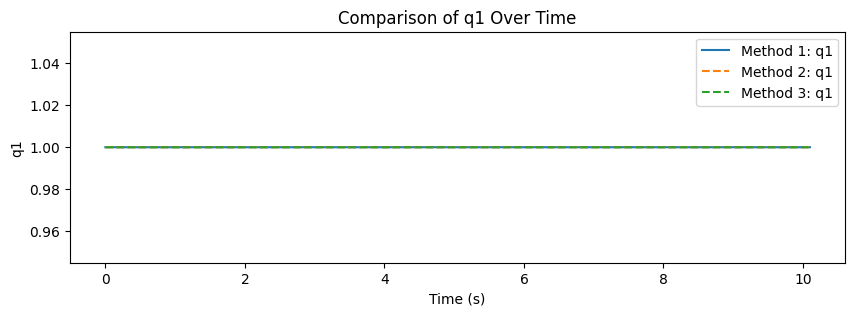

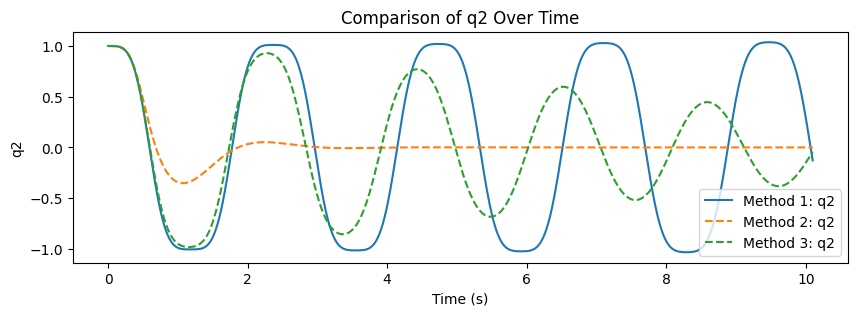

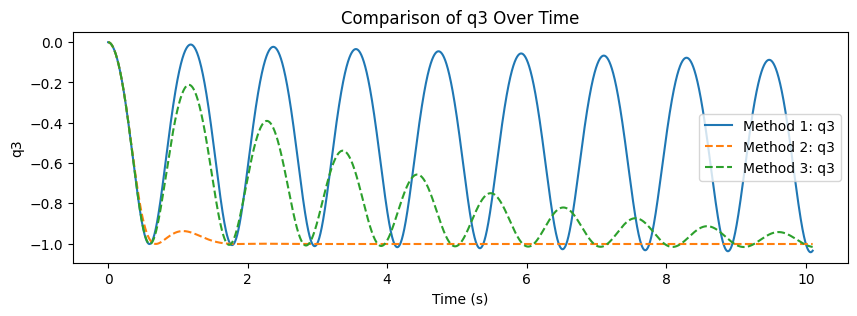

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate dynamics with given Qa calculation method, but now it returns q
def simulate_dynamics_return_q(Qa_method):
    # Initial parameters
    m1, g = 30, 9.81
    dt = 0.001
    t = np.arange(0, 10.1, dt)
    n = len(t)
    q = np.zeros((5, n))  # Reduced to necessary components
    q_v = np.zeros((5, n))
    q[:, 0] = [1, 1, 0, 0, 0]  # Initial conditions

    for i in range(n-1):
        q1, q2, q3 = q[0, i], q[1, i], q[2, i]
        qv1, qv2, qv3 = q_v[0, i], q_v[1, i], q_v[2, i]

        # Use provided Qa calculation method
        Qa = Qa_method(q1, q2, q3,qv1, qv2, qv3, m1)

        # Construct system matrix A and vector B
        A = np.array([[m1, 0, 0, q1, 1],
                      [0, m1, 0, q2, 0],
                      [0, 0, m1, q3, 0],
                      [q1, q2, q3, 0, 0],
                      [1, 0, 0, 0, 0]])
        garma = np.array([-qv1*qv1 - qv2*qv2 - qv3*qv3, 0])
        B = np.concatenate((Qa, garma))

        # Solve for acceleration
        acc = np.linalg.solve(A, B)
        q_v[:, i + 1] = q_v[:, i] + dt * acc
        q[:, i + 1] = q[:, i] + dt * q_v[:, i + 1]

    return q, t

# Qa calculation methods
def Qa_method_1(q1, q2, q3,qv1, qv2, qv3, m1):
    return np.array([0, 0, -m1*9.81])

def Qa_method_2(q1, q2, q3,qv1, qv2, qv3, m1):
    return np.array([0, -100*qv2, -m1*9.81])

def Qa_method_3(q1, q2, q3,qv1, qv2, qv3, m1):
    return np.array([0, -10*qv2, -m1*9.81])
# Execute simulations and get results
r1, t1 = simulate_dynamics_return_q(Qa_method_1)
r2, t2 = simulate_dynamics_return_q(Qa_method_2)
r3, t3 = simulate_dynamics_return_q(Qa_method_3)

# Plotting comparison for q1, q2, and q3
for j, label in enumerate(['q1', 'q2', 'q3']):
    plt.figure(figsize=(10, 3))
    plt.plot(t1, r1[j, :], label=f'Method 1: {label}')
    plt.plot(t2, r2[j, :], label=f'Method 2: {label}', linestyle='--')
    plt.plot(t3, r3[j, :], label=f'Method 3: {label}', linestyle='--')
    plt.title(f'Comparison of {label} Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel(label)
    plt.legend()
    plt.show()